In [1]:
import pandas as pd 

pd.set_option('display.max_colwidth', None)

In [2]:
df = pd.read_csv('./news_df_final.csv', encoding='utf-8')
df.head()

,title,url
0,제주 중학생 살해 백광석·김시남 징역 30년·27년 확정,https://news.kbs.co.kr/news/view.do?ncd=5520175&ref=A
1,"""귀신이 시켰다""…부모 집 찾아가 살해한 30대 구속 송치",https://www.hankyung.com/society/article/2022072927307
2,"이혼 요구한 아내 살해 혐의 50대 남성, 현행범 체포",http://www.newsis.com/view/?id=NISX20220728_0001959027&cID=10201&pID=10200
3,"""다른 남자와 있어서""...前 동거녀 살해한 40대 검찰 송치",https://www.ytn.co.kr/_ln/0103_202207290828459398
4,"‘제주 중학생 살해’ 백광석·김시남, 징역 30년·27년 확정",https://news.kmib.co.kr/article/view.asp?arcid=0017323864&code=61121311&cp=nv


In [3]:
from konlpy.tag import Okt
import re

for i in range(len(df)): # df 의 행 수만큼 for 문 돌린다.
    news = df.loc[i,'title'] # news 컬럼만의 각 값을 순서대로 가져온다.
    news =  re.findall('[가-힣]+|[가-힣]+\d+|\d+[가-힣]+',news)    # 가져온 행의 값에서 정규표현식 수행 # 영어 추가..\w
    news = ' '.join(news) # 위에서는 한글과 숫자만 추출된 요소들이 list 안에 있으니 전부를 하나로 묶어줌, 이때 스페이스로 분리
    news = re.sub('^\s+|\s+$|\s{2,}','',news) # 불필요한 공백들을 전부 제거

    okt = Okt()
    morph = okt.pos(news)
    noun_list = []
    for word, tag in morph:
        if (tag=='Noun') & (len(word) > 1):# 형용사 
            noun_list.append(word)
    noun_list= ' '.join(noun_list)
    
    df.loc[i,'nouns']= noun_list

In [4]:
from konlpy.tag import Okt
import re

for i in range(len(df)): 
    news = df.loc[i,'title'] 
    news =  re.search('(\d+)[대]',news)
    if news:
        news = news.group()
    

    df.loc[i,'age']= news
    
df

,title,url,nouns,age
0,제주 중학생 살해 백광석·김시남 징역 30년·27년 확정,https://news.kbs.co.kr/news/view.do?ncd=5520175&ref=A,제주 중학생 살해 광석 김시 징역 확정,NaN
1,"""귀신이 시켰다""…부모 집 찾아가 살해한 30대 구속 송치",https://www.hankyung.com/society/article/2022072927307,귀신 부모 살해 구속 송치,30대
2,"이혼 요구한 아내 살해 혐의 50대 남성, 현행범 체포",http://www.newsis.com/view/?id=NISX20220728_0001959027&cID=10201&pID=10200,이혼 요구 아내 살해 혐의 남성 현행범 체포,50대
3,"""다른 남자와 있어서""...前 동거녀 살해한 40대 검찰 송치",https://www.ytn.co.kr/_ln/0103_202207290828459398,다른 남자 동거 살해 검찰 송치,40대
4,"‘제주 중학생 살해’ 백광석·김시남, 징역 30년·27년 확정",https://news.kmib.co.kr/article/view.asp?arcid=0017323864&code=61121311&cp=nv,제주 중학생 살해 광석 김시 징역 확정,None
...,...,...,...,...
995,"“북송 어부 2인, 살해 혐의 진술 서로 달랐다”",https://www.joongang.co.kr/article/25088781,북송 어부 살해 혐의 진술 서로,None
996,"""현상금 265억원""…美요원 살해 '멕시코 마약왕' 체포",http://news.mt.co.kr/mtview.php?no=2022071615114022778,현상금 요원 살해 멕시코 마약 체포,None
997,"통일교 ""아베 살해범 母, 과거 통일교회 신자""",http://www.edaily.co.kr/news/newspath.asp?newsid=01889286632393208,통일교 아베 살해 과거 통일교회 신자,None
998,전처 집 침입해 남자친구 살해한 30대…징역 17년 불복 항소,https://www.seoul.co.kr/news/newsView.php?id=20220715500103&wlog_tag3=naver,침입 남자친구 살해 징역 불복 항소,30대


In [5]:
df.head(50)

,title,url,nouns,age
0,제주 중학생 살해 백광석·김시남 징역 30년·27년 확정,https://news.kbs.co.kr/news/view.do?ncd=5520175&ref=A,제주 중학생 살해 광석 김시 징역 확정,NaN
1,"""귀신이 시켰다""…부모 집 찾아가 살해한 30대 구속 송치",https://www.hankyung.com/society/article/2022072927307,귀신 부모 살해 구속 송치,30대
2,"이혼 요구한 아내 살해 혐의 50대 남성, 현행범 체포",http://www.newsis.com/view/?id=NISX20220728_0001959027&cID=10201&pID=10200,이혼 요구 아내 살해 혐의 남성 현행범 체포,50대
3,"""다른 남자와 있어서""...前 동거녀 살해한 40대 검찰 송치",https://www.ytn.co.kr/_ln/0103_202207290828459398,다른 남자 동거 살해 검찰 송치,40대
4,"‘제주 중학생 살해’ 백광석·김시남, 징역 30년·27년 확정",https://news.kmib.co.kr/article/view.asp?arcid=0017323864&code=61121311&cp=nv,제주 중학생 살해 광석 김시 징역 확정,None
5,"""왜 전 남친과 비교해"" 여자친구 살해한 20대 긴급체포",http://mbn.mk.co.kr/pages/news/newsView.php?category=mbn00009&news_seq_no=4812499,남친 비교 여자친구 살해 긴급 체포,20대
6,김연철 “16명 살해 흉악범 풀어주자는 현 정부 주장 동의할 국민 많지 않아”,https://www.khan.co.kr/politics/defense-diplomacy/article/202207271115011,김연 살해 흉악 정부 주장 동의 국민,None
7,동료 수형자 상습폭행 살해한 무기수 또 무기징역...유족 '울분',https://www.ytn.co.kr/_ln/0115_202207271651440069,동료 수형 상습 폭행 살해 무기수 무기징역 유족 울분,None
8,"""소중한것 뺏을게"" 사실혼女 아들 잔혹살해…70대까지 수감",https://www.joongang.co.kr/article/25090477,사실혼 아들 잔혹 살해 수감,70대
9,"지성X서지혜, 조력 관계 될까…父 살해 목격자 사망 '충격' (아다마스)[종합]",https://www.xportsnews.com/article/1611105,지성 서지혜 조력 관계 살해 목격자 사망 충격 다마스 종합,None


In [6]:
duplicated = df[df.duplicated(subset=['url'])]
duplicated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 13 to 980
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   141 non-null    object
 1   url     141 non-null    object
 2   nouns   141 non-null    object
 3   age     61 non-null     object
dtypes: object(4)
memory usage: 5.5+ KB


In [7]:
duplicated.sort_values(by=['url']).head()

,title,url,nouns,age
851,"튀르키예, 드론으로 이라크북부 차량 폭격…쿠르드반군 5명 살해",http://mbn.mk.co.kr/pages/news/newsView.php?category=mbn00008&news_seq_no=4806238,튀르키예 드론 이라크 북부 차량 폭격 쿠르드 반군 살해,None
251,"이혼 요구한 아내 협박하고 살해한 50대, 징역 20년 확정",http://mbn.mk.co.kr/pages/news/newsView.php?category=mbn00009&news_seq_no=4811632,이혼 요구 아내 협박 살해 징역 확정,50대
212,"'고문살해 의혹' 사우디 왕세자, 4년만에 유럽 순방",http://moneys.mt.co.kr/news/mwView.php?no=2022072709093153416,고문 살해 의혹 사우디 왕세자 유럽 순방,None
156,《사형을 집행하라!》 펴낸 김태수 변호사 | 어린이 性추행 살해 후 시신 토막...,http://monthly.chosun.com/client/news/viw.asp?ctcd=E&nNewsNumb=202208100037,사형 집행 김태수 변호사 어린이 추행 살해 시신 토막,None
901,19층에서 밀어 여친 살해한 30대男...징역 25년 불복 항소,http://news.heraldcorp.com/view.php?ud=20220718000598,여친 살해 징역 불복 항소,30대


In [8]:
df.drop_duplicates(inplace = True) 
df.reset_index(drop=True,inplace = True) # 인덱스 리셋

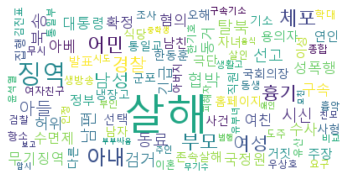

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

nouns = ' '.join(df['nouns'].values) # news 컬럼에 있는 텍스트를 연결하기
nouns = nouns.split() # 단어가 스페이스로 구분되어 있기 때문에

word_cloud_lst = Counter(nouns)
wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf',max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(word_cloud_lst)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
import collections
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

nouns = ' '.join(df['nouns'].values) # news 컬럼에 있는 텍스트를 연결하기
nouns = nouns.split() # 단어가 스페이스로 구분되어 있기 때문에

noun_lst = Counter(nouns)
topnouns = noun_lst.most_common(50)
topnouns


#plt.bar(word_cloud_lst.keys(), word_cloud_lst.values())

[('살해', 830),
 ('징역', 155),
 ('아내', 82),
 ('부모', 78),
 ('체포', 78),
 ('어민', 77),
 ('흉기', 69),
 ('경찰', 67),
 ('남성', 65),
 ('여성', 65),
 ('아들', 59),
 ('협박', 59),
 ('북송', 57),
 ('남편', 56),
 ('동료', 51),
 ('검거', 51),
 ('탈북', 50),
 ('시신', 49),
 ('긴급', 42),
 ('선고', 42),
 ('혐의', 39),
 ('무기징역', 39),
 ('여친', 38),
 ('허위', 37),
 ('확정', 36),
 ('동거', 35),
 ('국정원', 35),
 ('구속', 34),
 ('수사', 34),
 ('성폭행', 34),
 ('아베', 33),
 ('대통령', 32),
 ('수면제', 30),
 ('정부', 28),
 ('연인', 28),
 ('주장', 27),
 ('남친', 26),
 ('극단', 26),
 ('선택', 26),
 ('발표', 26),
 ('자녀', 25),
 ('용의자', 25),
 ('거짓', 23),
 ('다른', 22),
 ('사형', 22),
 ('직원', 22),
 ('존속살해', 21),
 ('국회의장', 21),
 ('홈페이지', 21),
 ('식당', 21)]

In [11]:
df.head(50)

,title,url,nouns,age
0,제주 중학생 살해 백광석·김시남 징역 30년·27년 확정,https://news.kbs.co.kr/news/view.do?ncd=5520175&ref=A,제주 중학생 살해 광석 김시 징역 확정,NaN
1,"""귀신이 시켰다""…부모 집 찾아가 살해한 30대 구속 송치",https://www.hankyung.com/society/article/2022072927307,귀신 부모 살해 구속 송치,30대
2,"이혼 요구한 아내 살해 혐의 50대 남성, 현행범 체포",http://www.newsis.com/view/?id=NISX20220728_0001959027&cID=10201&pID=10200,이혼 요구 아내 살해 혐의 남성 현행범 체포,50대
3,"""다른 남자와 있어서""...前 동거녀 살해한 40대 검찰 송치",https://www.ytn.co.kr/_ln/0103_202207290828459398,다른 남자 동거 살해 검찰 송치,40대
4,"‘제주 중학생 살해’ 백광석·김시남, 징역 30년·27년 확정",https://news.kmib.co.kr/article/view.asp?arcid=0017323864&code=61121311&cp=nv,제주 중학생 살해 광석 김시 징역 확정,None
5,"""왜 전 남친과 비교해"" 여자친구 살해한 20대 긴급체포",http://mbn.mk.co.kr/pages/news/newsView.php?category=mbn00009&news_seq_no=4812499,남친 비교 여자친구 살해 긴급 체포,20대
6,김연철 “16명 살해 흉악범 풀어주자는 현 정부 주장 동의할 국민 많지 않아”,https://www.khan.co.kr/politics/defense-diplomacy/article/202207271115011,김연 살해 흉악 정부 주장 동의 국민,None
7,동료 수형자 상습폭행 살해한 무기수 또 무기징역...유족 '울분',https://www.ytn.co.kr/_ln/0115_202207271651440069,동료 수형 상습 폭행 살해 무기수 무기징역 유족 울분,None
8,"""소중한것 뺏을게"" 사실혼女 아들 잔혹살해…70대까지 수감",https://www.joongang.co.kr/article/25090477,사실혼 아들 잔혹 살해 수감,70대
9,"지성X서지혜, 조력 관계 될까…父 살해 목격자 사망 '충격' (아다마스)[종합]",https://www.xportsnews.com/article/1611105,지성 서지혜 조력 관계 살해 목격자 사망 충격 다마스 종합,None


In [12]:
from konlpy.tag import Okt
import re

for i in range(len(df)): # df 의 행 수만큼 for 문 돌린다.
    news = df.loc[i,'nouns'] # news 컬럼만의 각 값을 순서대로 가져온다.
    news =  re.findall('([가-힣]*\s*[가-힣]+)\s살해',news)    # 가져온 행의 값에서 정규표현식 수행 # 영어 추가..\w
    news = ' '.join(news) # 위에서는 한글과 숫자만 추출된 요소들이 list 안에 있으니 전부를 하나로 묶어줌, 이때 스페이스로 분리


    
    df.loc[i,'victim']= news
df.head(50)

,title,url,nouns,age,victim
0,제주 중학생 살해 백광석·김시남 징역 30년·27년 확정,https://news.kbs.co.kr/news/view.do?ncd=5520175&ref=A,제주 중학생 살해 광석 김시 징역 확정,NaN,제주 중학생
1,"""귀신이 시켰다""…부모 집 찾아가 살해한 30대 구속 송치",https://www.hankyung.com/society/article/2022072927307,귀신 부모 살해 구속 송치,30대,귀신 부모
2,"이혼 요구한 아내 살해 혐의 50대 남성, 현행범 체포",http://www.newsis.com/view/?id=NISX20220728_0001959027&cID=10201&pID=10200,이혼 요구 아내 살해 혐의 남성 현행범 체포,50대,요구 아내
3,"""다른 남자와 있어서""...前 동거녀 살해한 40대 검찰 송치",https://www.ytn.co.kr/_ln/0103_202207290828459398,다른 남자 동거 살해 검찰 송치,40대,남자 동거
4,"‘제주 중학생 살해’ 백광석·김시남, 징역 30년·27년 확정",https://news.kmib.co.kr/article/view.asp?arcid=0017323864&code=61121311&cp=nv,제주 중학생 살해 광석 김시 징역 확정,None,제주 중학생
5,"""왜 전 남친과 비교해"" 여자친구 살해한 20대 긴급체포",http://mbn.mk.co.kr/pages/news/newsView.php?category=mbn00009&news_seq_no=4812499,남친 비교 여자친구 살해 긴급 체포,20대,비교 여자친구
6,김연철 “16명 살해 흉악범 풀어주자는 현 정부 주장 동의할 국민 많지 않아”,https://www.khan.co.kr/politics/defense-diplomacy/article/202207271115011,김연 살해 흉악 정부 주장 동의 국민,None,김연
7,동료 수형자 상습폭행 살해한 무기수 또 무기징역...유족 '울분',https://www.ytn.co.kr/_ln/0115_202207271651440069,동료 수형 상습 폭행 살해 무기수 무기징역 유족 울분,None,상습 폭행
8,"""소중한것 뺏을게"" 사실혼女 아들 잔혹살해…70대까지 수감",https://www.joongang.co.kr/article/25090477,사실혼 아들 잔혹 살해 수감,70대,아들 잔혹
9,"지성X서지혜, 조력 관계 될까…父 살해 목격자 사망 '충격' (아다마스)[종합]",https://www.xportsnews.com/article/1611105,지성 서지혜 조력 관계 살해 목격자 사망 충격 다마스 종합,None,조력 관계


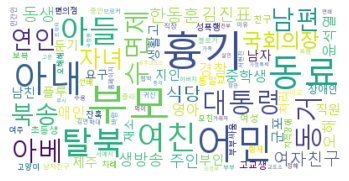

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

nouns = ' '.join(df['victim'].values) # news 컬럼에 있는 텍스트를 연결하기
nouns = nouns.split() # 단어가 스페이스로 구분되어 있기 때문에

word_cloud_lst = Counter(nouns)
wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf',max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(word_cloud_lst)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
import collections
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

nouns = ' '.join(df['victim'].values) # news 컬럼에 있는 텍스트를 연결하기
nouns = nouns.split() # 단어가 스페이스로 구분되어 있기 때문에

noun_lst = Counter(nouns)
topnouns = noun_lst.most_common(50)
topnouns



[('부모', 66),
 ('흉기', 63),
 ('어민', 59),
 ('동료', 48),
 ('아내', 46),
 ('탈북', 37),
 ('여친', 36),
 ('아들', 35),
 ('동거', 32),
 ('대통령', 29),
 ('아베', 27),
 ('수면제', 27),
 ('남편', 26),
 ('북송', 25),
 ('연인', 24),
 ('자녀', 22),
 ('국회의장', 21),
 ('식당', 17),
 ('여자친구', 16),
 ('김진표', 16),
 ('한동훈', 16),
 ('동생', 16),
 ('주인', 12),
 ('생방송', 12),
 ('경찰', 12),
 ('오해', 12),
 ('중학생', 11),
 ('윤석열', 11),
 ('애인', 11),
 ('영아', 11),
 ('군포', 10),
 ('제주', 9),
 ('남자', 9),
 ('둔기', 9),
 ('지인', 9),
 ('부인', 9),
 ('플루', 9),
 ('생활고', 9),
 ('직원', 9),
 ('남친', 9),
 ('요구', 8),
 ('재소', 8),
 ('처리', 8),
 ('장애인', 8),
 ('고교생', 8),
 ('여성', 8),
 ('초등생', 8),
 ('친구', 8),
 ('통일교', 8),
 ('잔혹', 7)]

In [14]:
from konlpy.tag import Okt
import re

for i in range(len(df)): # df 의 행 수만큼 for 문 돌린다.
    news = df.loc[i,'nouns'] # news 컬럼만의 각 값을 순서대로 가져온다.
    news =  re.findall('살해\s([가-힣]*\s*[가-힣]+)',news)    # 가져온 행의 값에서 정규표현식 수행 # 영어 추가..\w
    news = ' '.join(news) # 위에서는 한글과 숫자만 추출된 요소들이 list 안에 있으니 전부를 하나로 묶어줌, 이때 스페이스로 분리


    
    df.loc[i,'result']= news
df.head(50)

,title,url,nouns,age,victim,result
0,제주 중학생 살해 백광석·김시남 징역 30년·27년 확정,https://news.kbs.co.kr/news/view.do?ncd=5520175&ref=A,제주 중학생 살해 광석 김시 징역 확정,NaN,제주 중학생,광석 김시
1,"""귀신이 시켰다""…부모 집 찾아가 살해한 30대 구속 송치",https://www.hankyung.com/society/article/2022072927307,귀신 부모 살해 구속 송치,30대,귀신 부모,구속 송치
2,"이혼 요구한 아내 살해 혐의 50대 남성, 현행범 체포",http://www.newsis.com/view/?id=NISX20220728_0001959027&cID=10201&pID=10200,이혼 요구 아내 살해 혐의 남성 현행범 체포,50대,요구 아내,혐의 남성
3,"""다른 남자와 있어서""...前 동거녀 살해한 40대 검찰 송치",https://www.ytn.co.kr/_ln/0103_202207290828459398,다른 남자 동거 살해 검찰 송치,40대,남자 동거,검찰 송치
4,"‘제주 중학생 살해’ 백광석·김시남, 징역 30년·27년 확정",https://news.kmib.co.kr/article/view.asp?arcid=0017323864&code=61121311&cp=nv,제주 중학생 살해 광석 김시 징역 확정,None,제주 중학생,광석 김시
5,"""왜 전 남친과 비교해"" 여자친구 살해한 20대 긴급체포",http://mbn.mk.co.kr/pages/news/newsView.php?category=mbn00009&news_seq_no=4812499,남친 비교 여자친구 살해 긴급 체포,20대,비교 여자친구,긴급 체포
6,김연철 “16명 살해 흉악범 풀어주자는 현 정부 주장 동의할 국민 많지 않아”,https://www.khan.co.kr/politics/defense-diplomacy/article/202207271115011,김연 살해 흉악 정부 주장 동의 국민,None,김연,흉악 정부
7,동료 수형자 상습폭행 살해한 무기수 또 무기징역...유족 '울분',https://www.ytn.co.kr/_ln/0115_202207271651440069,동료 수형 상습 폭행 살해 무기수 무기징역 유족 울분,None,상습 폭행,무기수 무기징역
8,"""소중한것 뺏을게"" 사실혼女 아들 잔혹살해…70대까지 수감",https://www.joongang.co.kr/article/25090477,사실혼 아들 잔혹 살해 수감,70대,아들 잔혹,수감
9,"지성X서지혜, 조력 관계 될까…父 살해 목격자 사망 '충격' (아다마스)[종합]",https://www.xportsnews.com/article/1611105,지성 서지혜 조력 관계 살해 목격자 사망 충격 다마스 종합,None,조력 관계,목격자 사망


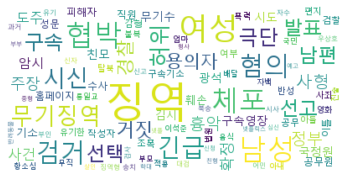

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

nouns = ' '.join(df['result'].values) # news 컬럼에 있는 텍스트를 연결하기
nouns = nouns.split() # 단어가 스페이스로 구분되어 있기 때문에

word_cloud_lst = Counter(nouns)
wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf',max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(word_cloud_lst)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
import collections
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

nouns = ' '.join(df['result'].values) # news 컬럼에 있는 텍스트를 연결하기
nouns = nouns.split() # 단어가 스페이스로 구분되어 있기 때문에

noun_lst = Counter(nouns)
topnouns = noun_lst.most_common(50)
topnouns



[('징역', 115),
 ('여성', 52),
 ('남성', 46),
 ('협박', 46),
 ('체포', 44),
 ('혐의', 37),
 ('검거', 36),
 ('긴급', 33),
 ('무기징역', 28),
 ('시신', 28),
 ('허위', 26),
 ('극단', 23),
 ('구속', 22),
 ('선고', 22),
 ('선택', 22),
 ('남편', 22),
 ('발표', 22),
 ('경찰', 21),
 ('거짓', 21),
 ('용의자', 20),
 ('사형', 18),
 ('흉악', 17),
 ('정부', 17),
 ('확정', 15),
 ('주장', 15),
 ('사건', 14),
 ('도주', 13),
 ('암시', 12),
 ('광석', 10),
 ('무기수', 10),
 ('국정원', 10),
 ('구속영장', 10),
 ('시도', 10),
 ('친모', 10),
 ('김시', 9),
 ('기소', 9),
 ('훼손', 9),
 ('홈페이지', 8),
 ('수사', 8),
 ('성문', 8),
 ('피해자', 8),
 ('직원', 8),
 ('공무원', 8),
 ('검찰', 7),
 ('작성자', 7),
 ('감형', 7),
 ('조폭', 7),
 ('여부', 7),
 ('구속기소', 7),
 ('이틀', 7)]